## Project 3_Data Aggregation, Grouping, Reshaping & Analysis

#### Professor: Stefanie Molin


Wei Lo 

### I. Project Introduction

#### Research Topic:

Sustainable Energy Transition: A Comprehensive Analysis of U.S. Electricity Consumption and Generation Patterns (2003-2023)


#### Research Objectives:

1.Temporal Trends in U.S. Electricity Consumption:

How has the overall electricity consumption in the United States evolved over the period from 2003 to 2023, and are there identifiable trends, peaks, or declines during specific periods?


2.Seasonal Variations in Electricity Consumption:

What seasonal patterns exist in U.S. electricity consumption across different months and seasons, and how do environmental, economic, or climatic factors influence these variations?


3.Evolution of Electricity Generation Sources:

How has the contribution of solar, wind, coal, petroleum, and natural gas to the overall electricity generation mix changed over the years? Are there notable shifts in the dominance of these energy sources during certain periods?


4.Comparison between Renewable and Traditional Energy Sources:

What is the proportion of electricity generated from renewable sources (solar and wind) compared to traditional sources (coal, petroleum, and natural gas)? How has this proportion changed over time, and what impact does it have on reducing reliance on fossil fuels?


5.Correlation and Causation in Energy Dynamics:

What correlations exist between electricity consumption, adoption of renewable energy, and usage of traditional energy sources? Can causative relationships be established, considering economic indicators, policy interventions, or technological advancements influencing these correlations?


6.Consumer Behavior in Seasonal Electricity Usage:

What are the behavioral patterns of consumers concerning electricity usage during different seasons, and how do societal, climatic, and economic factors influence these patterns?







### II. Data Summary

The dataset utilized in this analysis is a carefully curated compilation, rearranged, and combined from two distinct datasets obtained from the U.S. Energy Information Administration (EIA). The resulting dataset consists of seven columns: `YYYYMM`, representing the year and month; `1_coal`, `2_petroleum`, and `3_Natural_Gas` indicating electricity generation values in gigawatt-hours (GWh) for coal, petroleum, and natural gas sources, respectively; `7_consumption` denoting the total electricity consumption in GWh; and `11_solar` and `12_wind` representing the generation values for solar and wind energy sources, respectively.


The data used for this analysis was acquired from the U.S. Energy Information Administration (EIA) website (https://www.eia.gov/electricity/data.php). The dataset was then assembled, rearranged, and combined from two separate datasets to create a comprehensive dataset for analysis.


Source: U.S. Energy Information Administration (EIA)

Attributes:

Numeric Variables:

1_coal: Represents electricity generation from coal in gigawatt-hours (GWh).

2_petroleum: Represents electricity generation from petroleum in GWh.

3_Natural_Gas: Represents electricity generation from natural gas in GWh.

7_consumption: Represents total electricity consumption in GWh.

11_solar: Represents electricity generation from solar energy in GWh.

12_wind: Represents electricity generation from wind energy in GWh.

Categorical Variable:

YYYYMM: Represents the year and month in numeric format. While it is represented numerically, it is categorical in nature because it encodes specific categories (years and months) and does not have a continuous numerical meaning.


#### The sequence of operations conducted on the data files

1.Filtered 'electricity_con.csv':

Read the original 'electricity_con.csv' file into a DataFrame.
Filtered data based on specific conditions: 'YYYYMM' from 200301 to 202306, 'Column_Order' is 7, and 'MM' is not 13.
Removed columns 'MSN', 'Description', and 'Unit'.
Saved the filtered and modified DataFrame to 'filtered_electricity_con.csv'.

2.Filtered and Merged 'electricity_gen.csv':

Read the original 'electricity_gen.csv' file into a DataFrame.
Removed columns 'MSN', 'Description', and 'Unit'.
Filtered data based on conditions: 'YYYYMM' from 200301 to 202306 and 'Column_Order' is 1, 2, 3, 11, or 12.
Removed rows where 'MM' is 13 in the 'YYYYMM' column.
Read the previously filtered 'filtered_electricity_con.csv'.
Concatenated the two DataFrames.
Saved the merged DataFrame to 'merged_electricity_data.csv'.

3.Modified 'merged_electricity_data.csv':

Read the 'merged_electricity_data.csv' into a DataFrame.
Pivoted the DataFrame to split 'Column_Order' values into separate columns.
Renamed the columns to specific energy sources.
Saved the modified DataFrame back to 'merged_electricity_data.csv', overwriting the original data.

4.Dropped a Specific Row due to a invalid data:

Read the 'merged_electricity_data.csv' into a DataFrame.
Dropped the row where the 'YYYYMM' column has the value '202203'.
Saved the modified DataFrame back to 'merged_electricity_data.csv'.

In [1]:
from src.Energy_Analysis.part_1_summary import Sum
path = [
    "electricity_con.csv",
    "electricity_gen.csv"
]
data_sum = Sum(path)

df = data_sum.data_merger()

c:\Users\nicco\OneDrive - Yeshiva University\Desktop\Analytics programming\Sustainable_Energy_Transition_Analysis\src\Energy_Analysis\part_1_summary.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_con.drop(columns=columns_to_drop, inplace=True)


In [2]:
import pandas as pd


# Print the first few rows of the DataFrame to verify the data
print(df.head())


   YYYYMM      1_coal 2_petroleum 3_Natural_Gas 7_consumption 11_solar  \
0  200301  179356.205   12090.287     42546.203    319368.611   13.217   
1  200302  155283.289   10312.614     37040.553    295274.648    17.83   
2  200303  153322.956    9746.795     39959.137    288216.527   50.027   
3  200304  140368.836    8152.092     38725.144    269942.421   60.309   
4  200305  148573.997    7602.584     42536.347    282606.713   67.962   

    12_wind  
0   632.339  
1   745.375  
2  1036.104  
3  1092.766  
4  1006.383  



#### Utilize data aggregation, grouping, and reshaping techniques as an alternative approach to investigate the dataset further.

In [3]:
from src.Energy_Analysis.part_2_restructure import DataRestructure

df
# Usage
data_restructure = DataRestructure(df)



A. calculate_yearly_data:

Groups the data by year and calculates the sum of various energy types (coal, petroleum, natural gas, etc.) consumed or generated each year.

Explanation:
This method can help in understanding the yearly trends in energy consumption or generation. For instance, it can reveal whether there has been an increase or decrease in the overall usage of coal, petroleum, natural gas, solar, wind, etc., on a yearly basis.

In [4]:
# Execute different methods for analysis
data_restructure.calculate_yearly_data()

    Year                                             1_coal  \
0   2003  179356.205155283.289153322.956140368.836148573...   
1   2004  178714.851159782.9152551.421139830.581155287.5...   
2   2005  175247.522154168.211161863.022141460.358152345...   
3   2006  167478.176157015.046159588.963139729.958155290...   
4   2007  174252.799162199.173158273.044144798.894155991...   
5   2008  181336.696165343.004159283.729145586.621153472...   
6   2009  170625.513139742.743134313.758124802.774130526...   
7   2010  171660.23151461.095142664.919125614.64141669.2...   
8   2011  169390.428137082.332133583.554123271.719135820...   
9   2012  127873.502112773.619104410.42295284.3114929.68...   
10  2013  136952.224122483.696129469.24110786.244118379....   
11  2014  155916.303142217.613135290.235108278.679117738...   
12  2015  131430.696126023.568107471.00488146.966103671....   
13  2016  112623.9691909.15271345.75471419.1380934.70511...   
14  2017  114572.02186157.86388687.57580742.74292141.44

B.reshape_data:

Converts the 'YYYYMM' column to datetime format again; Creates 'Year' and 'Month' columns from the date; Produces a pivot table summarizing energy types ('1_coal', '2_petroleum', '3_Natural_Gas') for each month of each year.

Explanation:
This method pivots the data to display the consumption or generation of various energy types for each month of every year. It helps in observing monthly patterns or seasonality in energy usage or generation.

In [5]:
data_restructure.reshape_data()

           1_coal                                                              \
Month          1           2           3           4           5           6    
Year                                                                            
2003   179356.205  155283.289  153322.956  140368.836  148573.997  160558.842   
2004   178714.851  159782.900  152551.421  139830.581  155287.538  165842.103   
2005   175247.522  154168.211  161863.022  141460.358  152345.331  173147.214   
2006   167478.176  157015.046  159588.963  139729.958  155290.028  167906.785   
2007   174252.799  162199.173  158273.044  144798.894  155991.340  171993.816   
2008   181336.696  165343.004  159283.729  145586.621  153472.660  169600.094   
2009   170625.513  139742.743  134313.758  124802.774  130526.754  146844.980   
2010   171660.230  151461.095  142664.919  125614.640  141669.249  163912.106   
2011   169390.428  137082.332  133583.554  123271.719  135820.363  156716.150   
2012   127873.502  112773.61

C. calculate_mean_sum_specific_columns & mean_by_year_sum_columns:

Computes the mean and sum of specific energy types across the entire dataset.
Prints the mean and sum values for each energy type.

Explanation:
This method calculates the average and total consumption or generation for specific energy types, offering an overall view of these energy sources throughout the entire dataset.

In [6]:
data_restructure.calculate_mean_sum_specific_columns()

Mean values:
Series([], dtype: float64)

Sum values:
1_coal           179356.205155283.289153322.956140368.836148573...
2_petroleum      12090.28710312.6149746.7958152.0927602.5841051...
3_Natural_Gas    42546.20337040.55339959.13738725.14442536.3474...
dtype: object


c:\Users\nicco\OneDrive - Yeshiva University\Desktop\Analytics programming\Sustainable_Energy_Transition_Analysis\src\Energy_Analysis\part_2_restructure.py:102: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = self.df[["1_coal", "2_petroleum", "3_Natural_Gas"]].mean()


In [7]:
data_restructure.calculate_mean_by_year_sum_by_month()

Mean by Year:
Empty DataFrame
Columns: []
Index: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Sum by Month:
                                                  1_coal  \
Month                                                      
1      179356.205178714.851175247.522167478.176174252...   
2      155283.289159782.9154168.211157015.046162199.1...   
3      153322.956152551.421161863.022159588.963158273...   
4      140368.836139830.581141460.358139729.958144798...   
5      148573.997155287.538152345.331155290.028155991...   
6      160558.842165842.103173147.214167906.785171993...   
7      180005.823179599.998184212.948185951.209183483...   
8      183469.256176372.529185729.956187576.335188516...   
9      163243.213162593.099169922.065159899.187167888...   
10     157577.568155903.778160731.395159674.126160696...   
11     156536.197155766.731157091.052157817.29157935....   
12     174417.644174942.18217

c:\Users\nicco\OneDrive - Yeshiva University\Desktop\Analytics programming\Sustainable_Energy_Transition_Analysis\src\Energy_Analysis\part_2_restructure.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ].mean()


D.reshape_stack_unstack:

Stacks and unstacks the DataFrame based on 'Year' and 'Month' columns for '1_coal' and '2_petroleum'.

Explanation:
By stacking and unstacking the data, this method shows the consumption or generation values of certain energy types across months and years. It allows for observing how these values change on a monthly and yearly basis.

In [8]:
data_restructure.reshape_stack_unstack()

Stacked Data:
Year  Month             
2003  1      1_coal         179356.205
             2_petroleum     12090.287
      2      1_coal         155283.289
             2_petroleum     10312.614
      3      1_coal         153322.956
                               ...    
2023  4      2_petroleum      1145.886
      5      1_coal          43267.393
             2_petroleum      1099.207
      6      1_coal          57375.877
             2_petroleum      1151.062
Length: 490, dtype: object

Unstacked Data:
                1_coal 2_petroleum
Year Month                        
2003 1      179356.205   12090.287
     2      155283.289   10312.614
     3      153322.956    9746.795
     4      140368.836    8152.092
     5      148573.997    7602.584
...                ...         ...
2023 2        45931.15    1358.398
     3       49479.147    1178.561
     4       39504.857    1145.886
     5       43267.393    1099.207
     6       57375.877    1151.062

[245 rows x 2 columns]


### III. Exploratory Data Analysis

In [9]:
from src.Energy_Analysis.part_3_eda import EDA
import pandas as pd

# Read the CSV file
analysis = pd.read_csv('merged_electricity_data.csv')

# Create an instance of the EDA class
eda_analysis = EDA(analysis)

# Generate summary statistics
summary_stats = eda_analysis.generate_summary_statistics()
print("Summary Statistics:")
print(summary_stats)




Summary Statistics:
              YYYYMM         1_coal   2_petroleum  3_Natural_Gas  \
count     245.000000     245.000000    245.000000     245.000000   
mean   201278.277551  123880.297473   3483.145208   89408.288061   
std       591.497388   39393.901279   2962.757146   31955.203931   
min    200301.000000   39504.857000   1056.426000   36949.147000   
25%    200802.000000   89114.281000   1574.777000   63532.326000   
50%    201303.000000  130526.754000   2104.262000   87042.470000   
75%    201804.000000  157091.052000   4199.306000  111539.534000   
max    202306.000000  188516.118000  14534.853000  181324.104000   

       7_consumption      11_solar       12_wind  
count     245.000000    245.000000    245.000000  
mean   322049.926416   2856.077020  14334.001784  
std     31032.801956   4029.307306  11322.907142  
min    269942.421000      2.713000    632.339000  
25%    298673.664000     72.846000   3490.232000  
50%    315862.690000    596.287000  12701.961000  
75%    339

Summary statistics:

Range of Values: The data spans over a period from 2003 to 2023 (YYYYMM) and provides statistics for various energy sources (1_coal, 2_petroleum, 3_Natural_Gas, 7_consumption, 11_solar, 12_wind).

Data Count: All columns have a consistent count of 245 entries, indicating no missing values in the dataset.

Measures of Central Tendency:

The mean values show the average magnitude of electricity generation/consumption for each source.

Median values (50th percentile) demonstrate the middle point of the data distribution.
Variability Measures:

Standard deviation (std) reveals the extent of variability or dispersion from the mean. Higher values indicate more spread-out data.

Quartiles (25th, 50th, 75th percentiles) show the data's distribution into quarters, helping understand the range of values and identify potential outliers.

Observations:

Notable differences between mean and median might indicate skewness or asymmetry in the distribution of some energy sources.
The standard deviation values indicate the extent of variability around the mean, with higher values suggesting wider fluctuations in certain sources.
The range between quartiles helps to assess the spread of values around the median, showing how data is distributed across different percentiles.


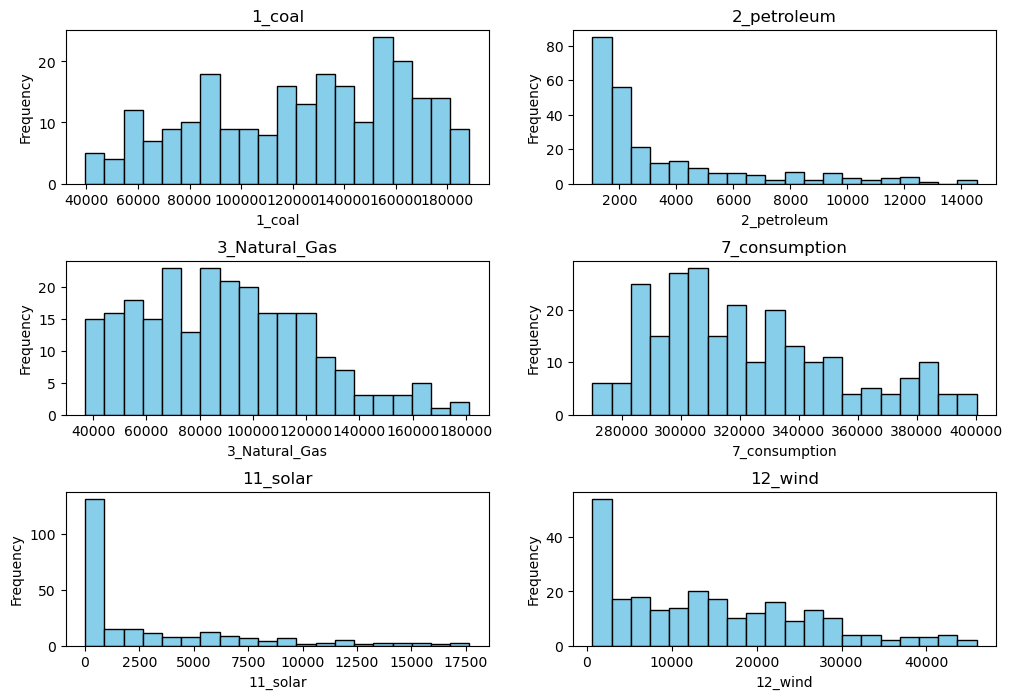

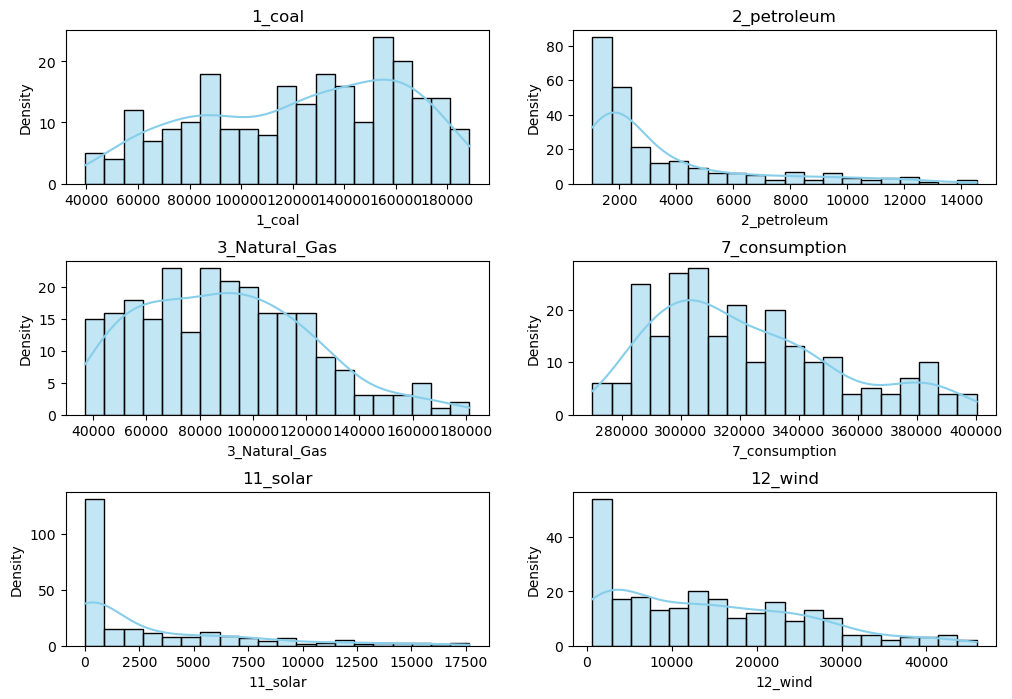

In [10]:
# Generate histograms
eda_analysis.generate_histograms()

Observations:
Histograms display the shape of data distribution for each variable, confirming skewness or normality compared to the mean and median from summary statistics.
They help identify the spread and density of values across the range of data.

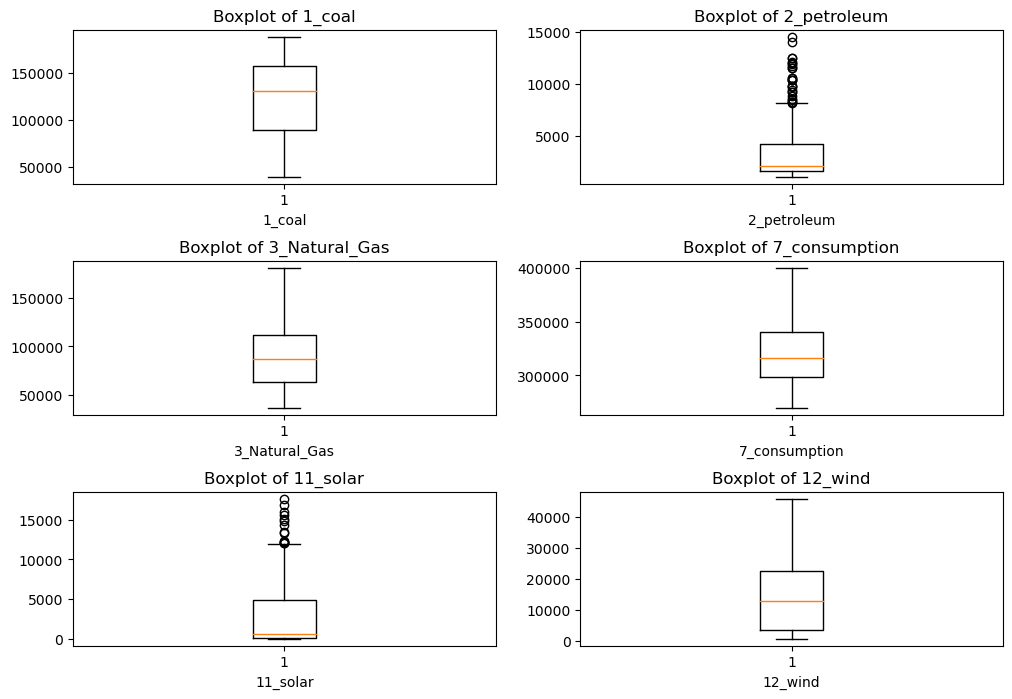

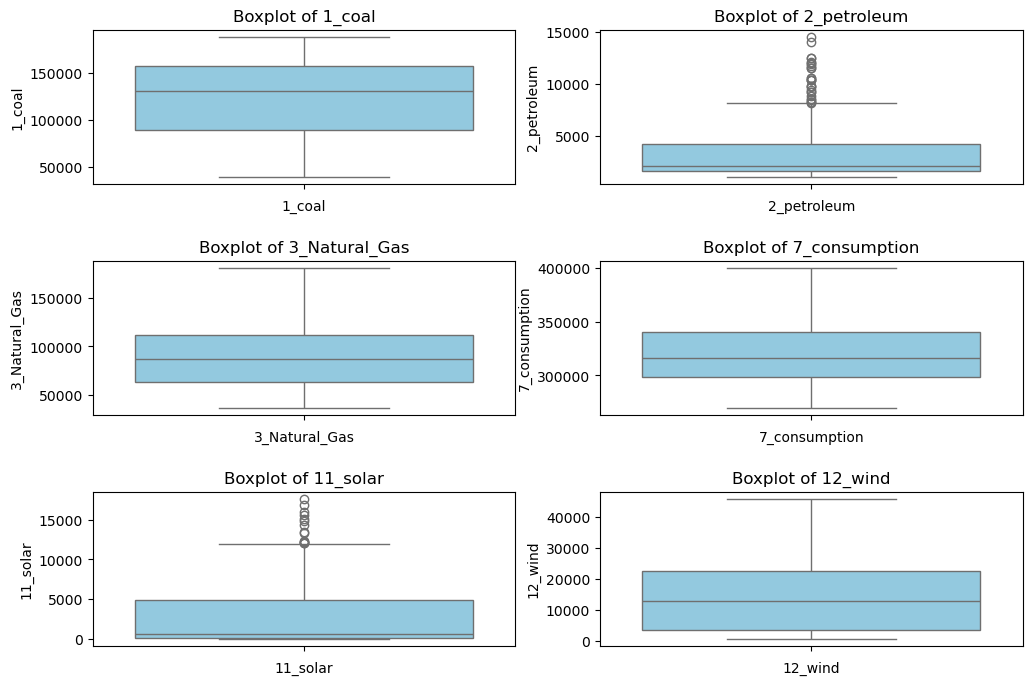

In [11]:
# Generate Box plots
eda_analysis.generate_box_plots()

Observations:
Median and quartiles align with the mean from summary statistics.
Outliers may appear as data points beyond the whiskers in box plots.

<Figure size 1200x800 with 0 Axes>

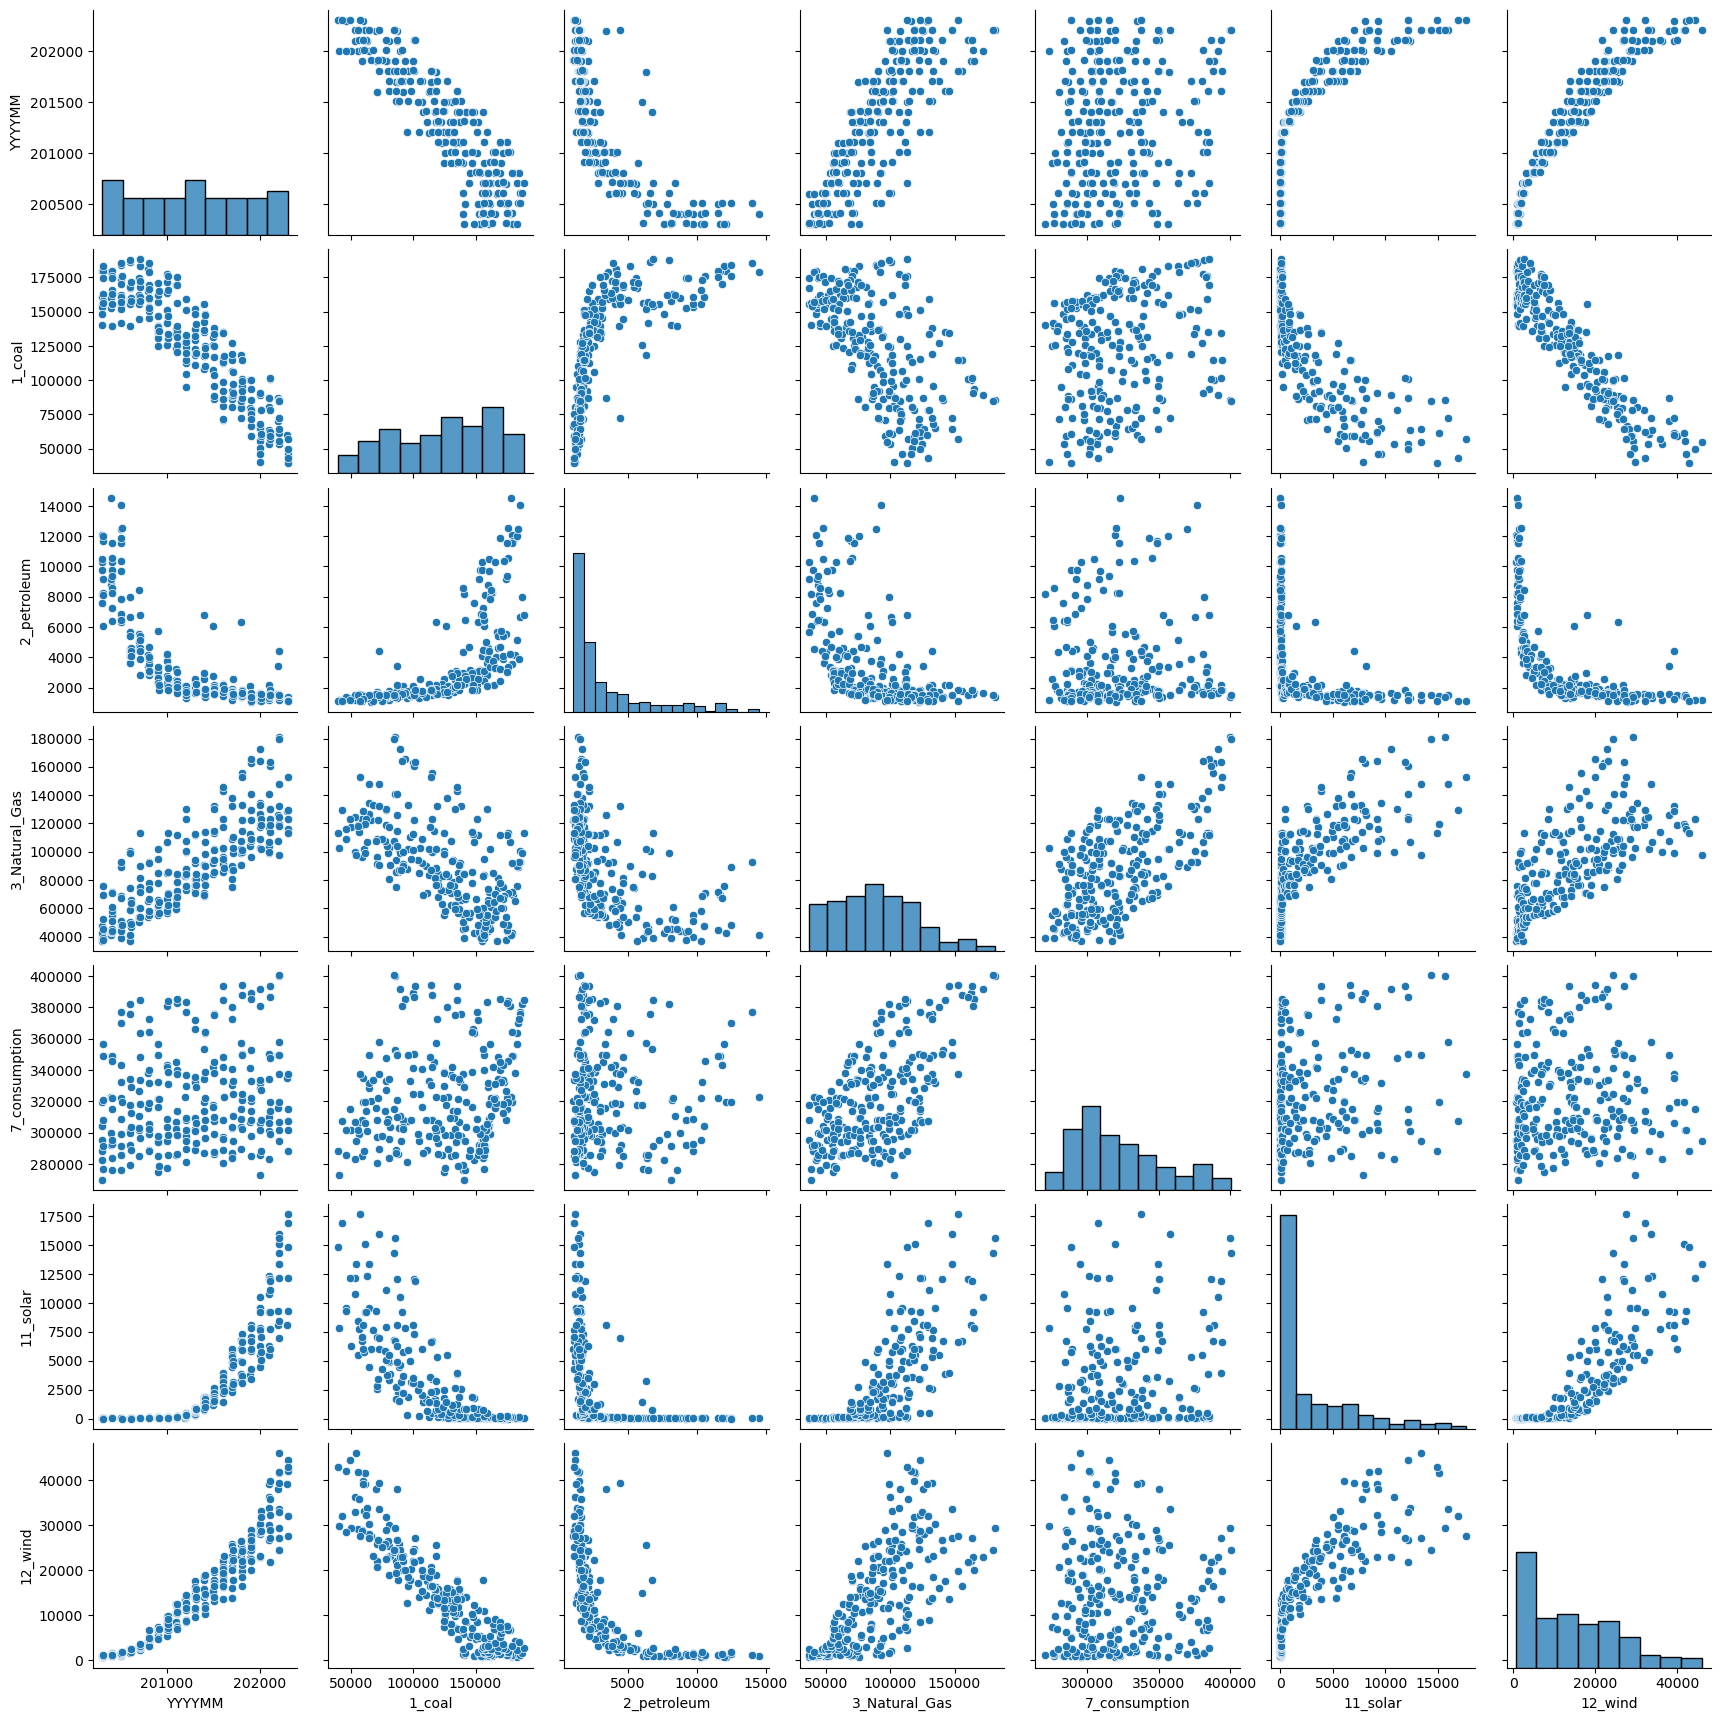

In [12]:
# Generate Scatter plots
eda_analysis.generate_scatter_plots()

Observations:
Scatter plots display the strength and direction of relationships between energy sources and consumption.
They can align with the correlation values shown in the correlation heatmap.

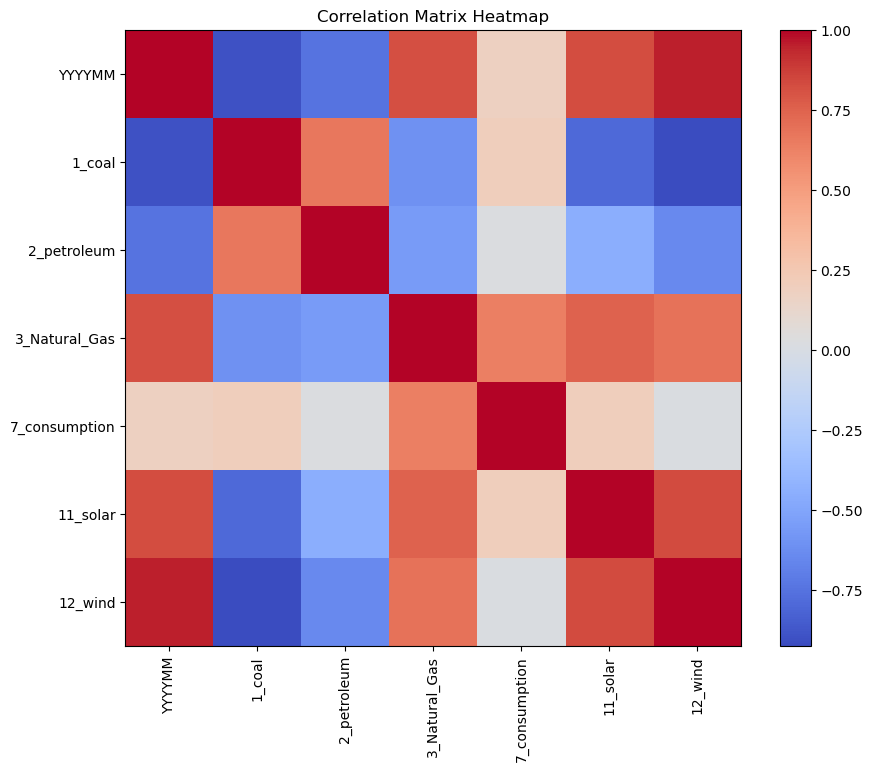

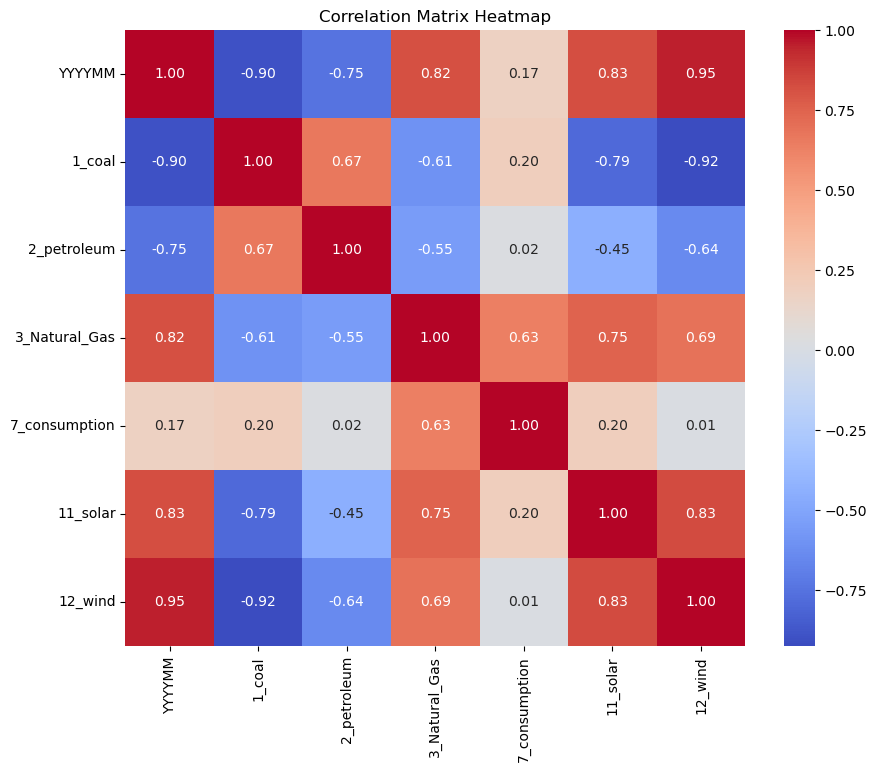

In [13]:
eda_analysis.generate_correlation_heatmap()

Observations:
Correlation heatmap values range from -1 to 1, indicating the strength and direction of linear relationships between variables.
Correlation heatmap values correspond to the correlation values in the summary statistics (e.g., mean, standard deviation).

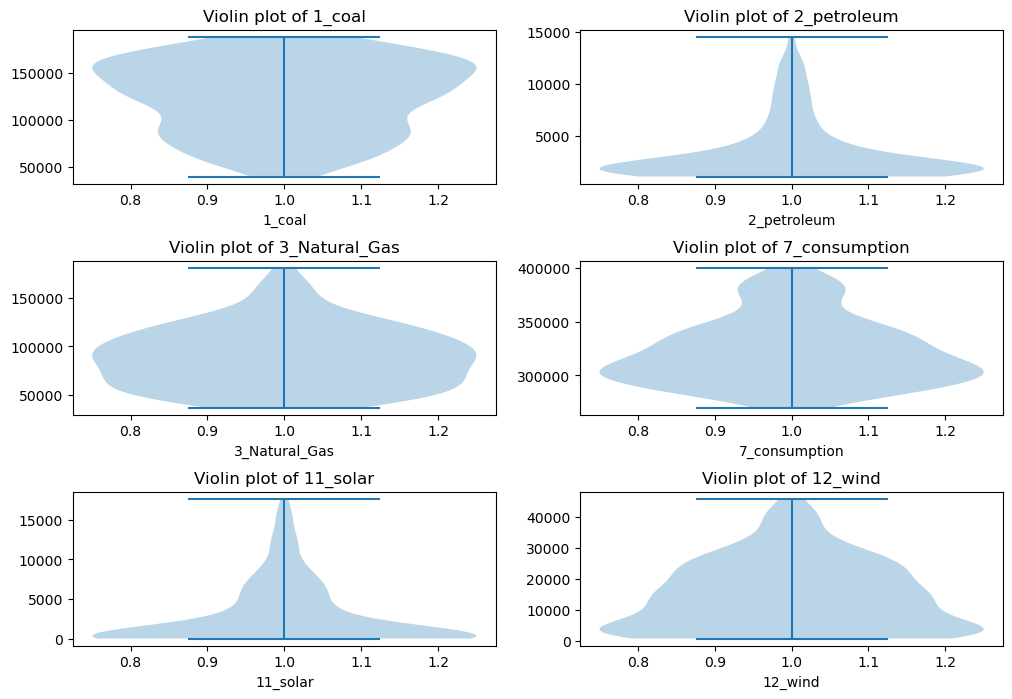

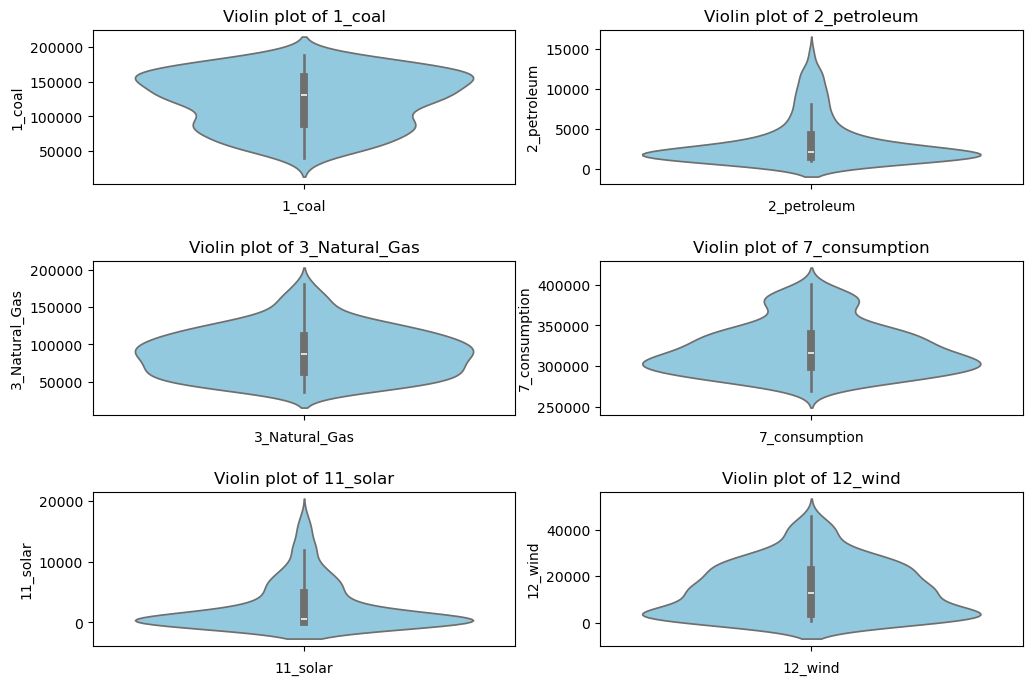

In [14]:
eda_analysis.generate_violin_plots()

Observations:
Violin plots complement histograms by providing a visual representation of the data's density and distribution, showing where the data is most concentrated.


#### From the given Exploratory Data Analysis, several insights about the electricity consumption and generation in the dataset can be derived:


1.Electricity Consumption Trends:

The average electricity consumption throughout the analyzed period stands at about 322,050 GWh. The consumption ranges from a minimum of approximately 269,942 GWh to a maximum of around 400,275 GWh.

The consistent consumption levels are evident, indicated by a relatively narrow range of values (standard deviation of about 31,033 GWh), signifying stable trends over time.

2.Traditional Energy Sources:

Among coal, petroleum, and natural gas, coal exhibits the highest average generation (around 123,880 GWh), while petroleum shows the lowest (approximately 3,483 GWh).
Natural gas falls in between, boasting an average generation of about 89,408 GWh.

3.Renewable Energy Sources:

Solar and wind energy, considered as renewable sources, display noteworthy differences. Wind energy demonstrates a higher average generation (approximately 14,334 GWh) compared to solar energy (around 2,856 GWh).

Both renewable sources present significantly lower average generation figures in contrast to traditional sources.

4.Variability in Generation:

Traditional energy sources exhibit considerable variability in generation, with coal showing higher consistency (lower standard deviation) in comparison to petroleum and natural gas.

Renewable sources, particularly wind energy, also depict variability in generation, apparent from their standard deviation.

5.Comparing Traditional and Renewable Sources:

Traditional sources (coal, petroleum, and natural gas) contribute substantially more to overall electricity generation (in GWh) compared to solar and wind energy sources.

6.Potential for Renewable Energy Growth:

Despite lower average generation, renewable sources, especially wind energy, demonstrate significant potential for expansion. While their absolute generation remains lower, their growth trajectory signifies promise for the future. 




### IV. Inference

Calculate proportions of renewable and traditional energy sources

In [15]:
from src.Energy_Analysis.part_4_inference import EnergyAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV data into a DataFrame (assuming it's named 'merged_electricity_data.csv')
analysis = pd.read_csv('merged_electricity_data.csv')


# Create an instance of the EnergyAnalysis class
energy_analysis = EnergyAnalysis(analysis)

# Calculate proportions of renewable and traditional energy sources
renewable_proportion, traditional_proportion = energy_analysis.calculate_proportions()






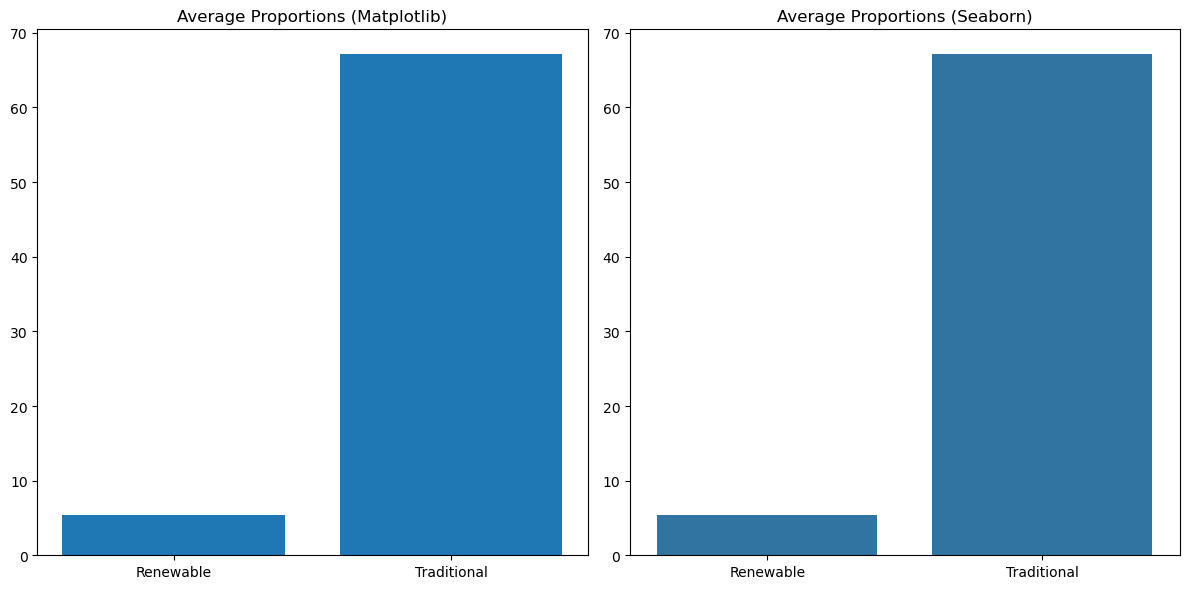

In [16]:
# Plot trends
plt.figure(figsize=(12, 6))

# Matplotlib plot
plt.subplot(1, 2, 1)
plt.bar(['Renewable', 'Traditional'], [renewable_proportion.mean(), traditional_proportion.mean()])
plt.title('Average Proportions (Matplotlib)')

# Seaborn plot
plt.subplot(1, 2, 2)
sns.barplot(x=['Renewable', 'Traditional'], y=[renewable_proportion.mean(), traditional_proportion.mean()])
plt.title('Average Proportions (Seaborn)')

plt.tight_layout()
plt.show()

##### Implications:

Heavy Reliance on Traditional Sources: The dominance of traditional sources, constituting the majority of electricity consumption, suggests a heavy reliance on these fossil fuels. This reliance might pose challenges related to environmental sustainability, considering the associated carbon emissions and their impact on climate change.

Potential for Renewable Energy Growth: The relatively low proportion of renewable energy highlights the vast potential for growth in the renewable sector. Increasing the share of renewables can lead to a more sustainable energy mix, reducing carbon emissions and mitigating the environmental impact associated with fossil fuels.

##

#### Conduct the following analyses to develop our comprehensive understanding of our research topic:

In [17]:
# Load data
analysis = pd.read_csv('merged_electricity_data.csv')

# Initialize EnergyAnalysis object
energy_analysis = EnergyAnalysis(analysis)



##### 4_1 Temporal Trends in U.S. Electricity Consumption:
How has the overall electricity consumption in the United States evolved over the period from 2003 to 2023, and are there identifiable trends, peaks, or declines during specific periods?

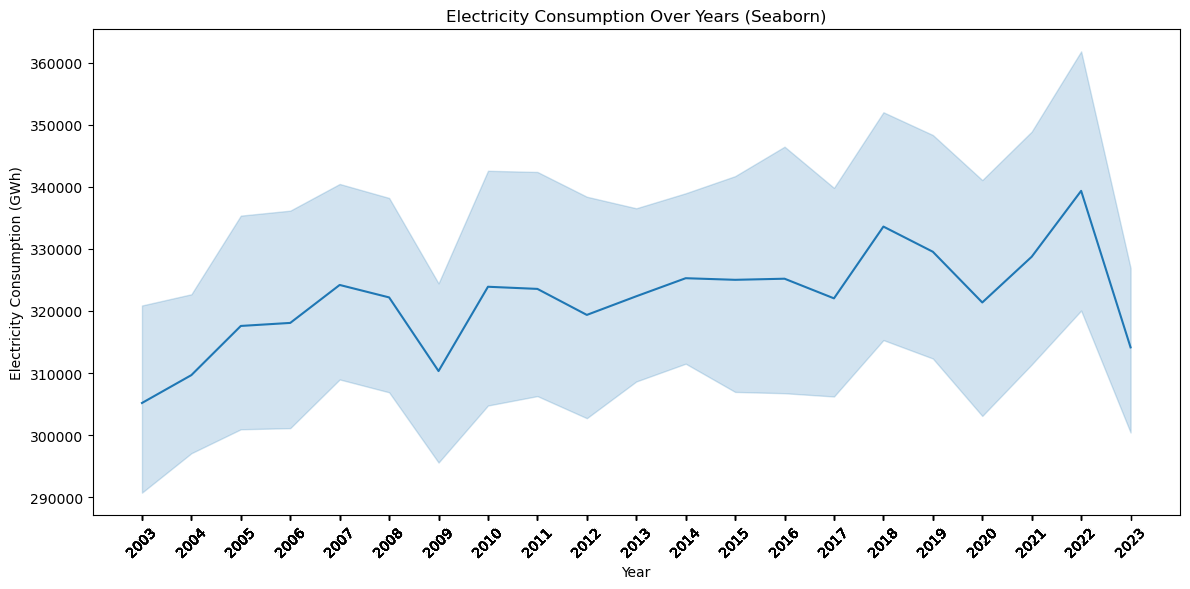

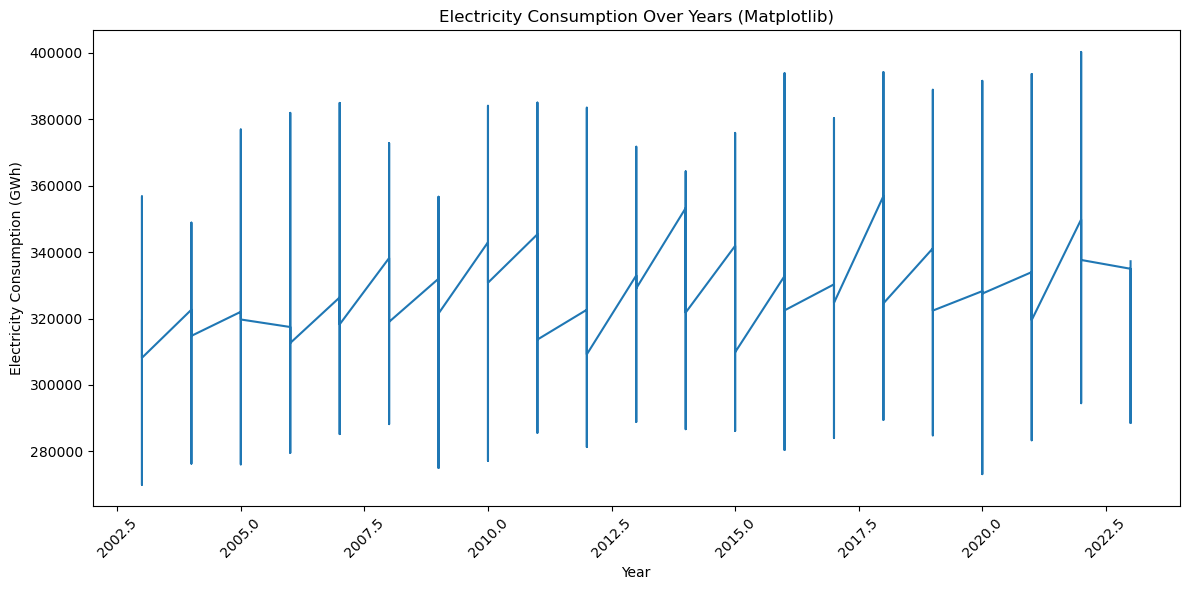

In [18]:
# Task 1: Plotting consumption over year
energy_analysis.task_1()



4_1_Insights:


The modest standard deviation of approximately 31,033 GWh points to a narrow range of electricity consumption in the U.S. from 2003 to 2023. This stability signifies a consistent and steady pattern in electricity usage, lacking substantial fluctuations or dramatic shifts in demand during this timeframe. This steadiness is advantageous for energy planning and management, offering predictability in the demand for electricity within the United States over the analyzed period.

##### 4_2 Seasonal Variations in Electricity Consumption:

What seasonal patterns exist in U.S. electricity consumption across different months and seasons, and how do environmental, economic, or climatic factors influence these variations?

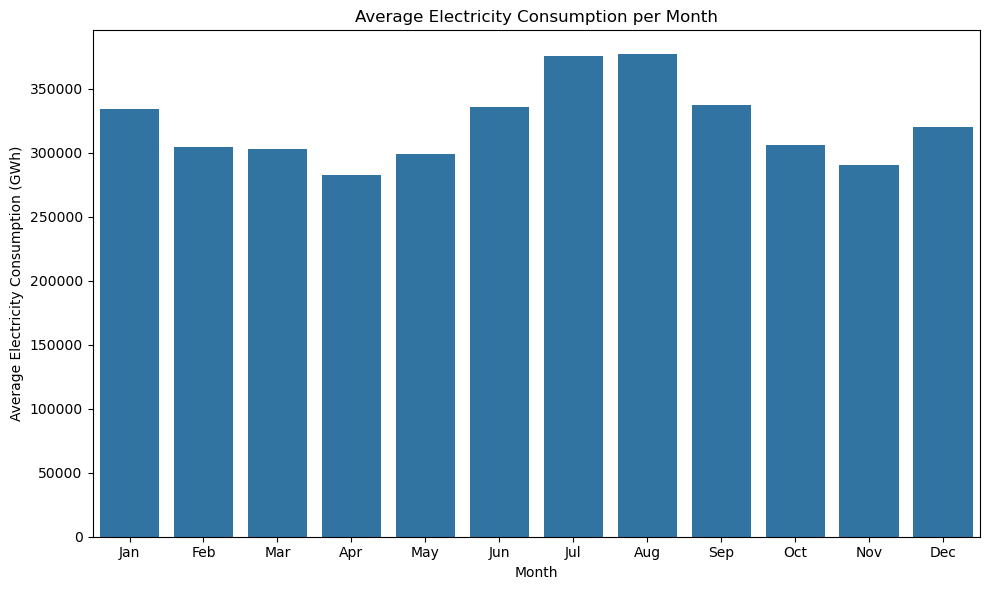

In [19]:
# Task 2: Is there a seasonal pattern in electricity consumption?
energy_analysis.task_2()

4_2_Insights:

1.Regular Seasonal Peaks: Consistent high points observed in July, August, and January indicate recurring electricity consumption patterns. These peaks likely stem from increased usage of air conditioning in hot summers and heating systems during winter, driving up energy demands.

2.Adaptation to Seasonal Changes: The stability of these patterns across years suggests that consumers may have adjusted to seasonal variations. This adaptation could involve employing energy-efficient technologies or practices to manage energy consumption during these high-demand months.

3.Influence of Economic Activities: Seasonal consumption peaks may also mirror heightened economic activities. For example, summer months align with increased tourism and vacation periods, impacting energy usage in hotels, restaurants, and leisure facilities. Similarly, more indoor activities during winter contribute to higher electricity consumption.

4.Impact of Policies and Awareness: The consistent nature of these patterns may reflect the sustained effects of energy policies, awareness campaigns, or incentives promoting energy conservation during peak seasons. This indicates a potential impact of ongoing efforts to educate the public about energy-saving practices.

5.Strengthened Infrastructure: Utilities and energy providers may have enhanced infrastructure to handle predictable surges in demand, ensuring a stable supply during periods of heightened consumption. This signifies the resilience of the energy infrastructure in accommodating seasonal electricity demands.





##### 4_3 Evolution of Electricity Generation Sources:
How has the contribution of solar, wind, coal, petroleum, and natural gas to the overall electricity generation mix changed over the years? Are there notable shifts in the dominance of these energy sources during certain periods?


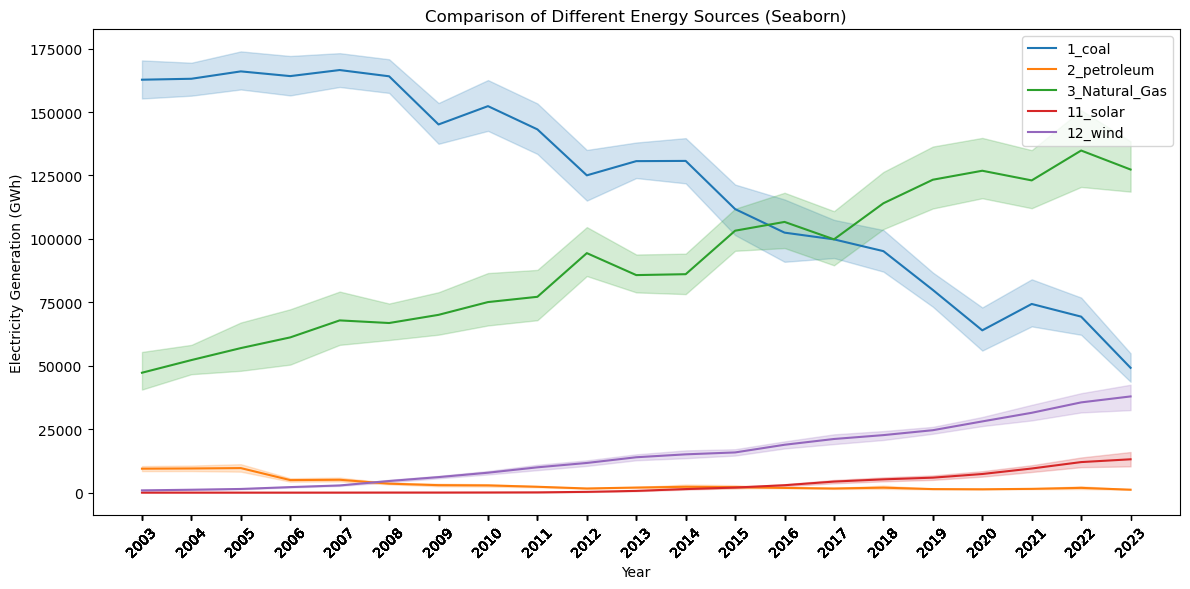

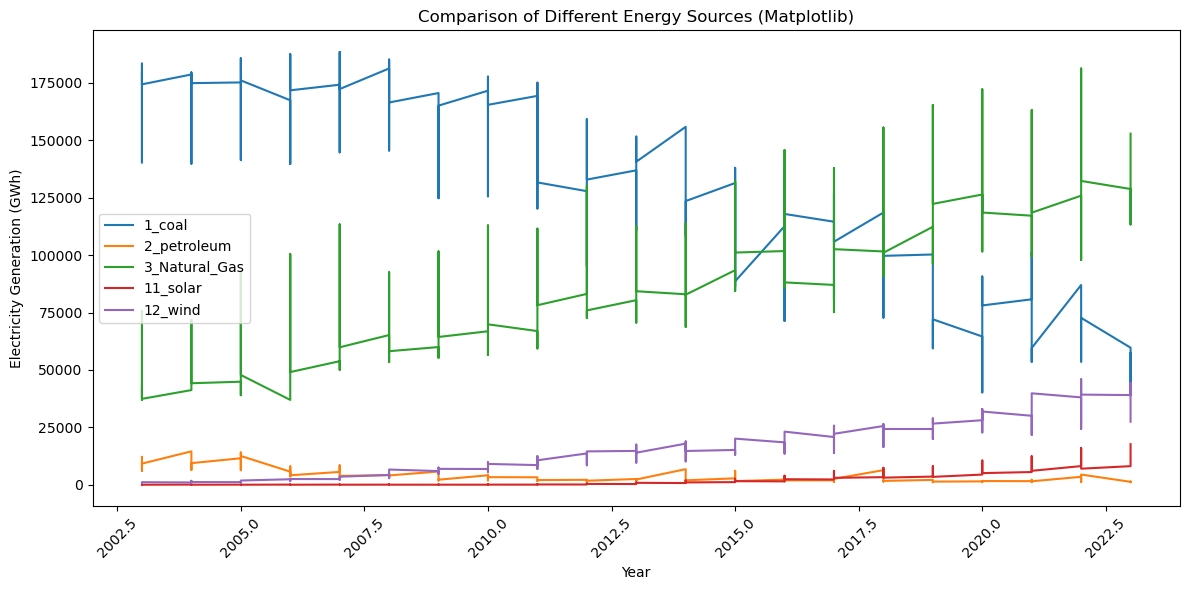

In [20]:
# Task 3: Compare consumption with different energy resource generation
energy_analysis.task_3()

4_3_Insights:

1.Steady Expansion of Solar and Wind Energy: A consistent upward trend in solar and wind energy generation showcases substantial investments made in renewable energy infrastructure.

2.Transitioning Energy Landscape: Despite not entirely dominating the sector like natural gas, renewables, notably solar and wind, have shown consistent growth and increased contribution. This shift signals a significant move towards cleaner and more sustainable energy sources. This gradual transition aligns with broader environmental and energy policy objectives aimed at promoting cleaner energy alternatives.

##### 4_4 Comparison between Renewable and Traditional Energy Sources:

What is the proportion of electricity generated from renewable sources (solar and wind) compared to traditional sources (coal, petroleum, and natural gas)? How has this proportion changed over time, and what impact does it have on reducing reliance on fossil fuels?

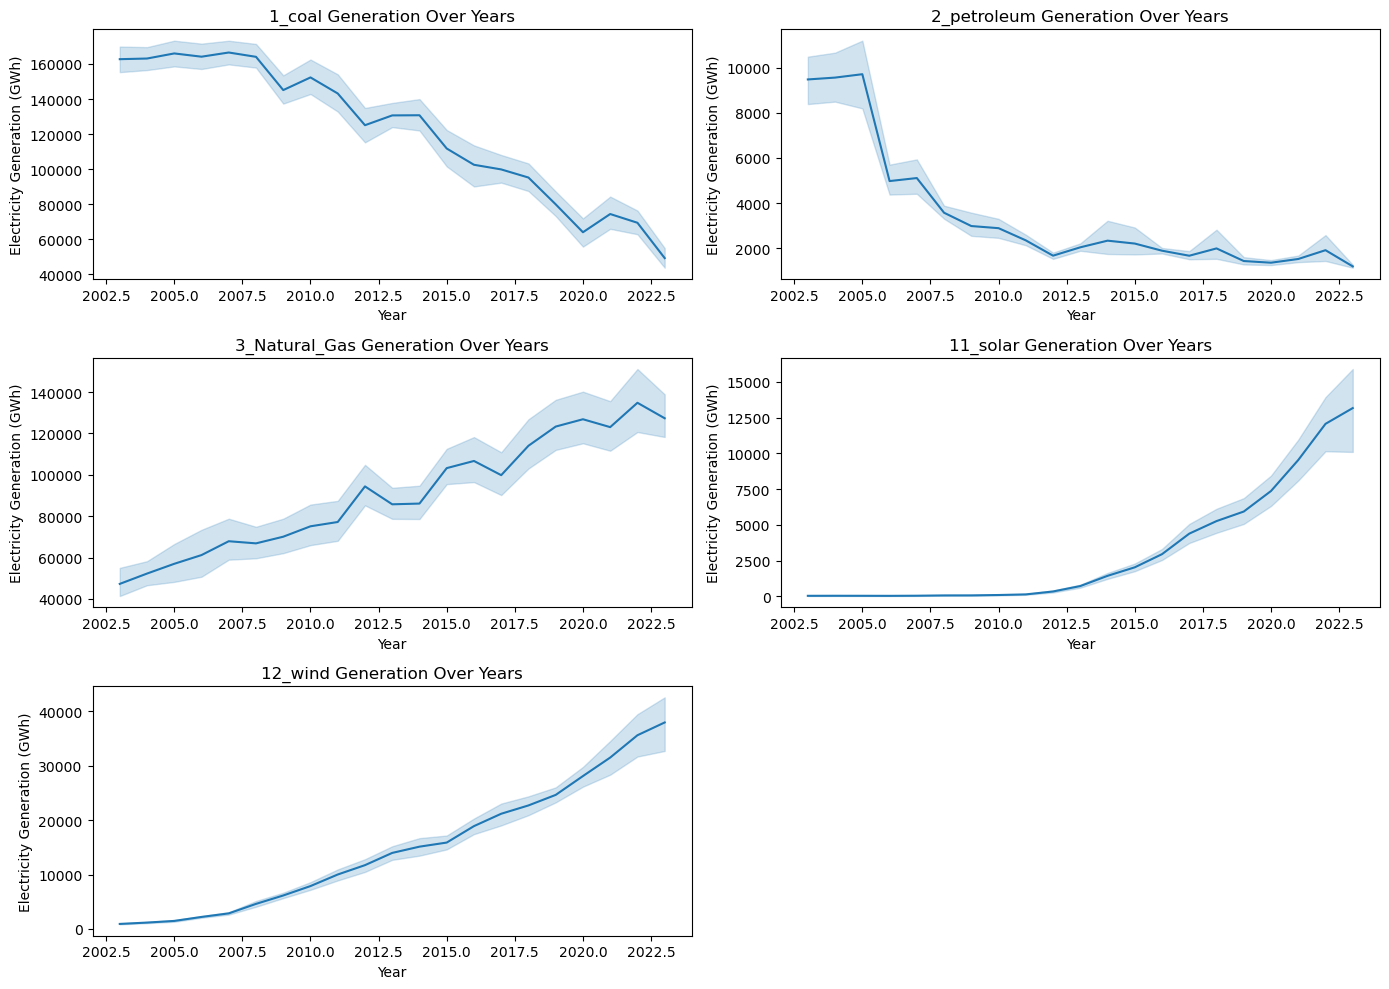

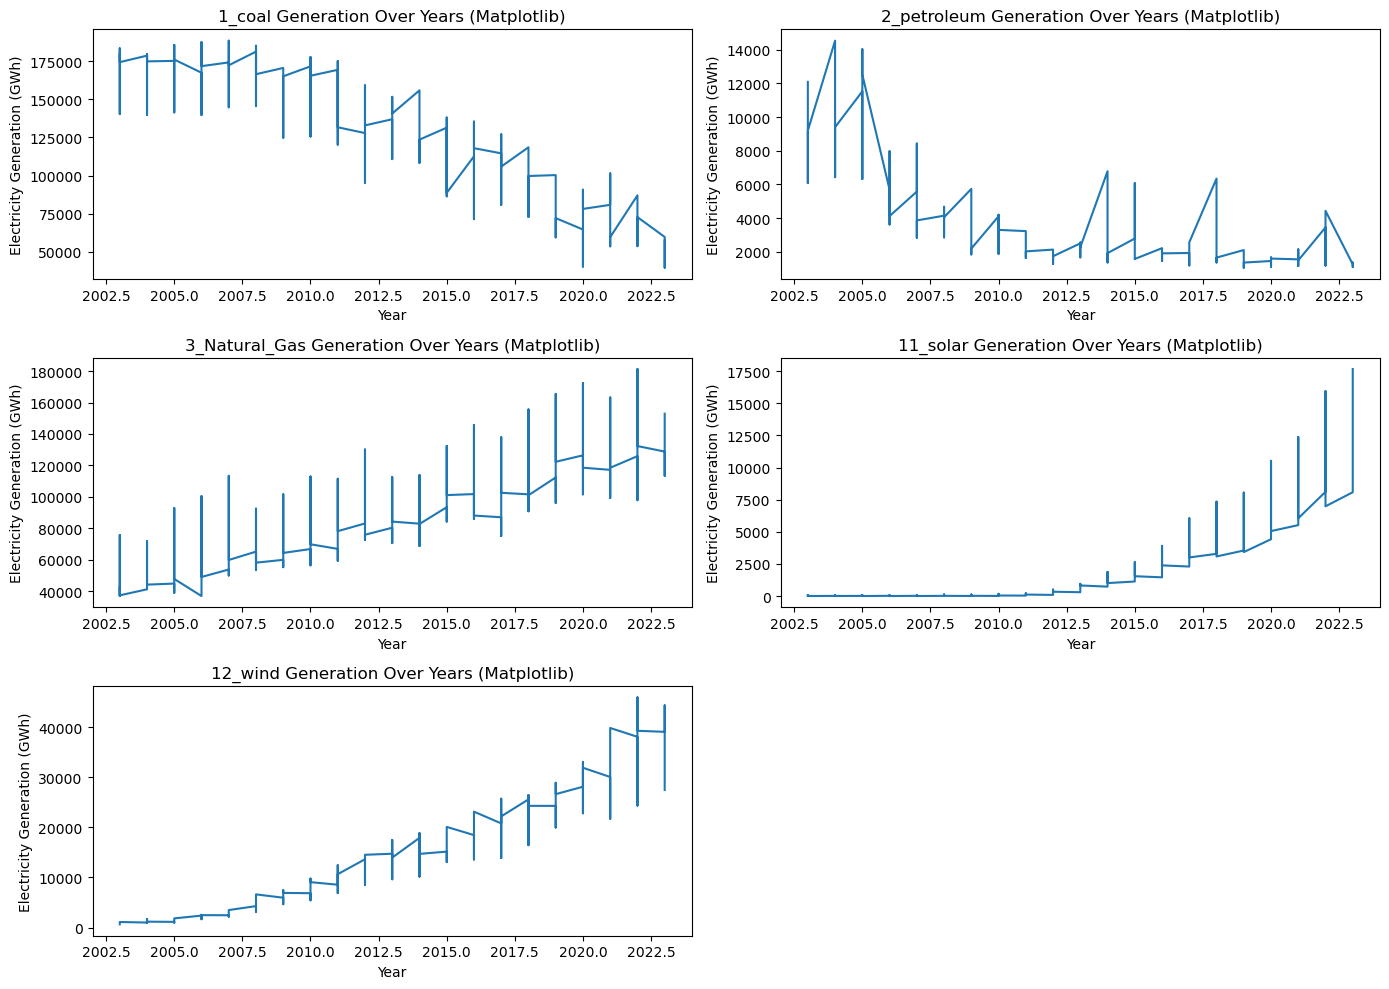

In [21]:
# Task 4: Plot each energy generation over time
energy_analysis.task_4()

4_4_Insights:

1.Shifting from Fossil Fuels to Renewables: The data indicates a considerable drop in electricity generation from coal and petroleum sources. This decline highlights a substantial move away from conventional fossil fuels towards renewable alternatives. Although natural gas remains prominent, this shift represents a pivotal step toward adopting more sustainable energy practices.

2.Emphasis on Grid Innovation and Storage: The notable surge in renewable energy generation emphasizes the critical need for grid modernization and energy storage solutions. These advancements are vital for maintaining a consistent and dependable energy supply, especially considering the intermittent nature of solar and wind energy sources.


##### 4_5 Correlation and Causation in Energy Dynamics:

What correlations exist between electricity consumption, adoption of renewable energy, and usage of traditional energy sources? Can causative relationships be established, considering economic indicators, policy interventions, or technological advancements influencing these correlations?

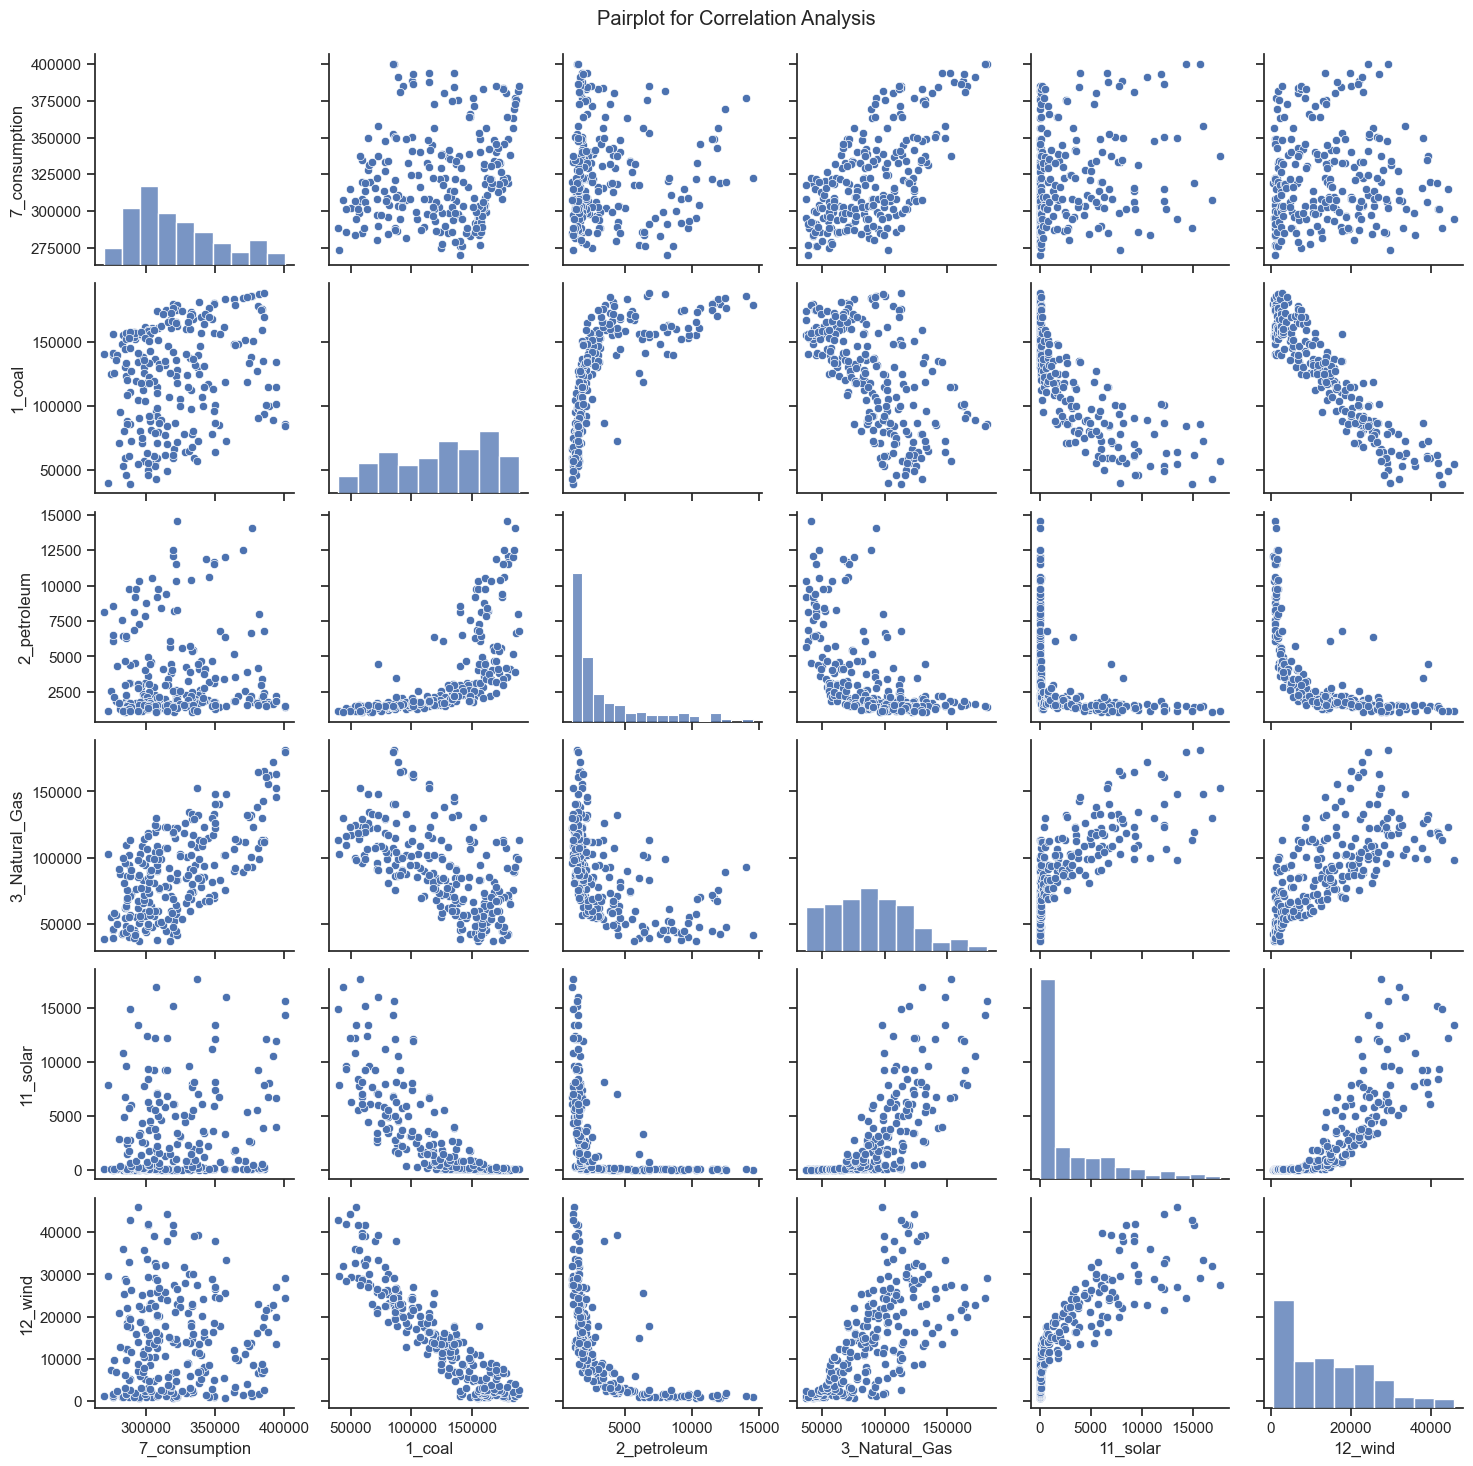

In [22]:
# Task 5: Pairplot for correlation analysis
energy_analysis.task_5()

4_5_Insights:


The detailed analysis from the Pairplot examination highlights significant correlations among electricity consumption and different energy sources. Key observations include robust negative correlations between coal generation and renewable sources (solar and wind), indicating a potential transition from coal to cleaner energy options. Moreover, the positive correlation observed between total electricity consumption and natural gas implies its sustained usage alongside the increasing adoption of renewables. These insights suggest a complex relationship between various energy sources, portraying the evolving dynamics within the energy sector.

4_6 Trend Analysis (generation):

How has the overall electricity generation in the U.S. evolved from 2003 to 2023? Are there any significant upward or downward trends?

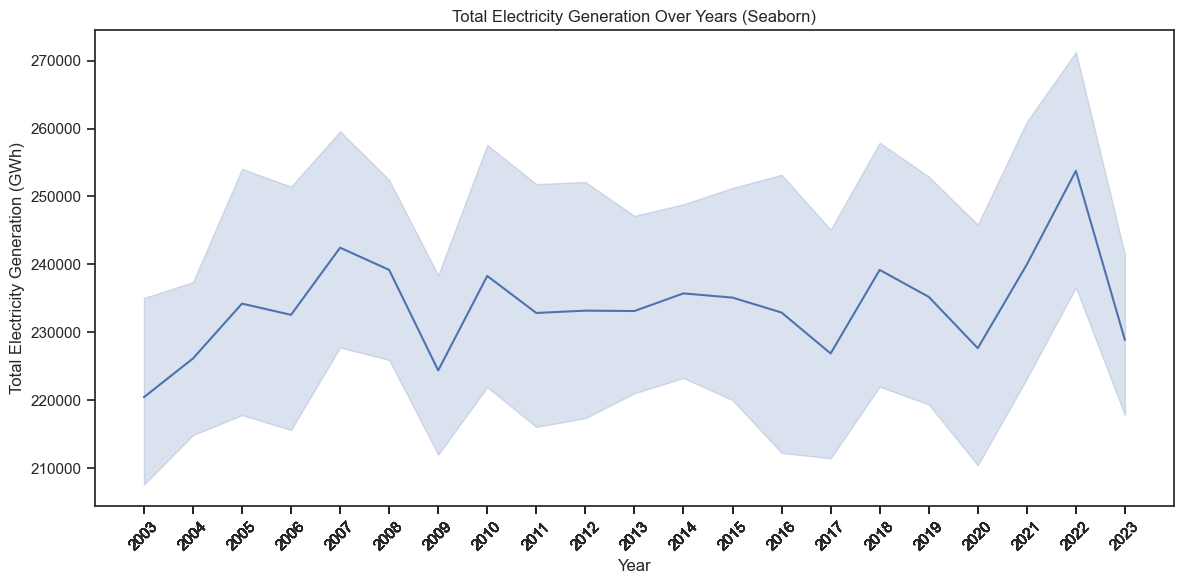

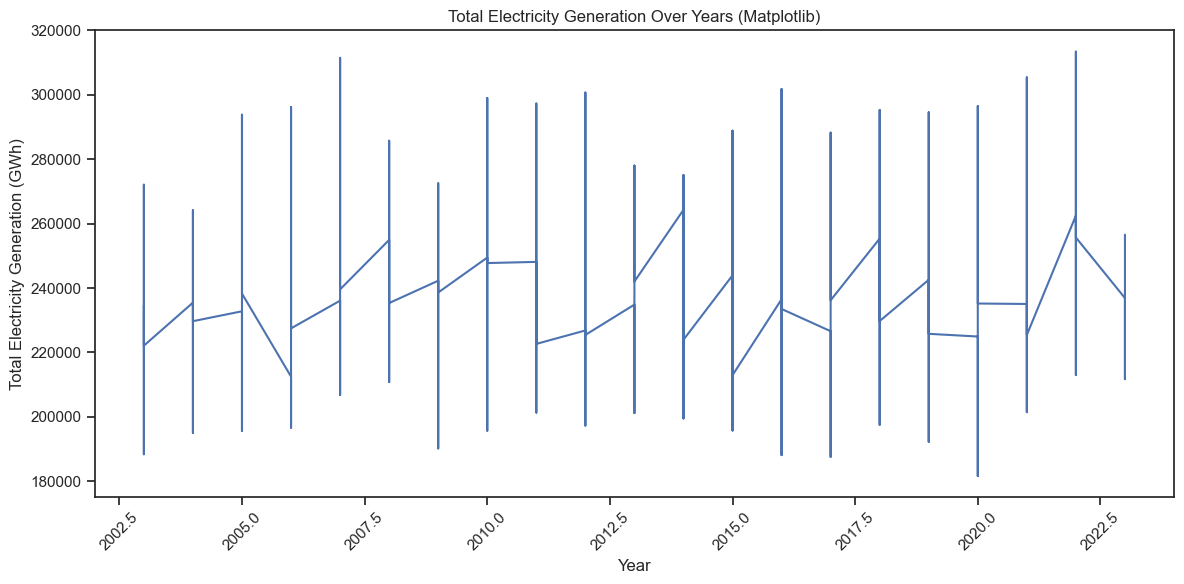

In [23]:
# Task 6: How has the total energy generation changed over the years?
energy_analysis.task_6()

4_6_Insights:

Consistent Electricity Generation: Throughout the period from 2003 to 2023, the electricity production in the U.S. remained relatively stable. This steadfast output indicates a robust energy infrastructure within the nation. The consistency in generation might signify effective energy management practices, adaptability to changing demands, or a harmonious balance between renewable and traditional sources to meet the country's energy requirements. A more in-depth analysis could unveil the underlying factors contributing to this enduring stability.







4_7 the statistical relationship between electricity consumption

In [24]:
# Task 7: Correlation between consumption, traditional energy, and renewable energy
energy_analysis.task_7()

Correlation between Consumption and Energy Sources:
1_coal           0.197545
2_petroleum      0.016342
3_Natural_Gas    0.633879
11_solar         0.197299
12_wind          0.013642
Name: 7_consumption, dtype: float64


4_7_Insights:

1.Natural Gas Influence: A substantial positive correlation (approximately 0.63) between electricity consumption and natural gas generation suggests a significant connection. This implies that increased electricity demand coincides with heightened natural gas generation, indicating its crucial role in meeting peak demands or consistent high energy needs.

2.Limited Impact of Energy Sources: Coal and solar exhibit weak positive correlations (0.20) with consumption, while petroleum and wind show negligible positive correlations (0.02 and 0.01, respectively). These correlations imply a minor or minimal influence of these sources on overall electricity consumption trends.

3.Diverse Energy Dynamics: Varied correlation strengths underscore the diversity within the energy mix. While natural gas shows a strong relationship with consumption, the weaker correlations of coal, petroleum, solar, and wind suggest a more intricate relationship with consumption patterns. Understanding these connections is pivotal for strategic energy planning and policymaking.

4_8 Comprehensive Correlation Analysis:

Beyond individual correlations, what comprehensive insights can be gained from analyzing the correlation heatmap? Are there clusters of variables that strongly influence each other?

c:\Users\nicco\OneDrive - Yeshiva University\Desktop\Analytics programming\Sustainable_Energy_Transition_Analysis\src\Energy_Analysis\part_4_inference.py:293: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


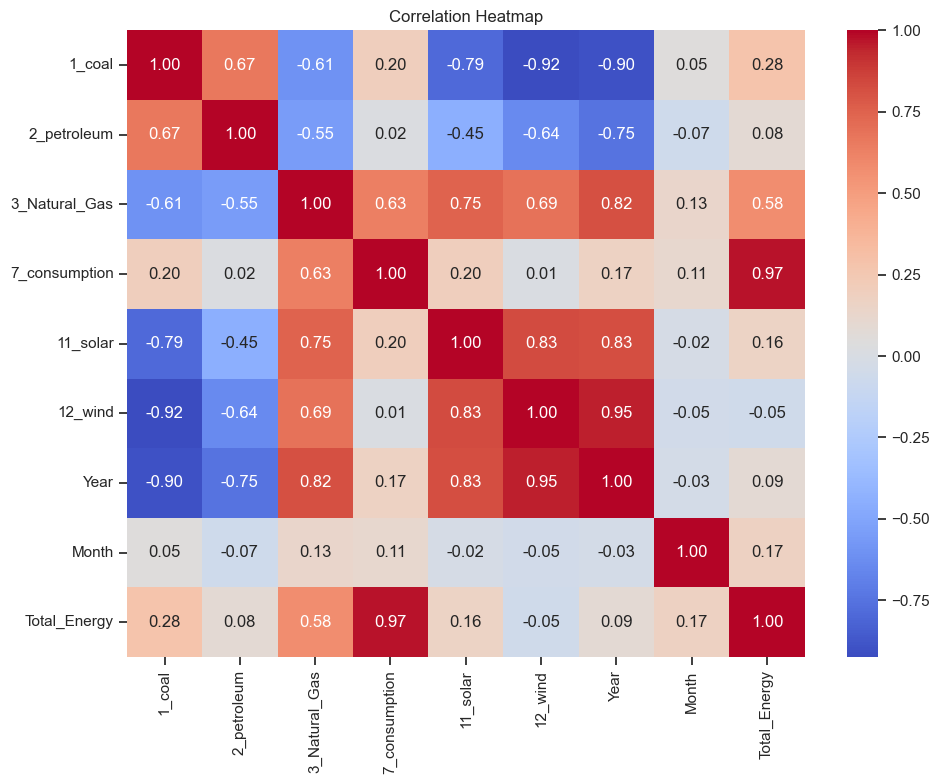

In [25]:
# Task 8: Plotting the correlation heatmap
energy_analysis.task_8()

4_8_Insights:

1.Intra-Energy Source Relations: The heatmap reveals robust positive correlations among different energy sources. Notably, solar and wind energy exhibit a positive correlation, suggesting simultaneous shifts in these renewable sources. Similarly, positive correlations between coal and petroleum highlight shared trends in traditional fossil fuel generation.

2.Transition Dynamics: Negative correlations between natural gas and coal/petroleum signal a shift in energy production dynamics. As natural gas generation increases, coal and petroleum generation tends to decrease. This trend might reflect strategic adjustments in the energy sector, possibly influenced by economic, environmental, or policy factors.

3.Correlation Patterns with Consumption: Understanding how energy sources correlate with consumption is vital. A strong positive correlation between consumption and natural gas suggests a predominant reliance on natural gas to meet consumer demand. Meanwhile, weaker correlations with other sources imply a lesser direct impact on consumption.

4.Market Flexibility: Natural gas, known for its flexibility, demonstrates negative correlations, implying adaptability to demand fluctuations. Its quick adjustability contrasts with coal and petroleum, which might have slower response times, reducing production during periods of high natural gas demand.tends to decrease. This pattern might reflect a strategic shift in the energy sector, possibly due to economic, environmental, or policy considerations.




4_9 Seasonality Exploration:

Delving deeper into seasonality, what specific insights can be derived from the box plots of total electrical consumption for each month? Are there outliers or consistent patterns in specific months?

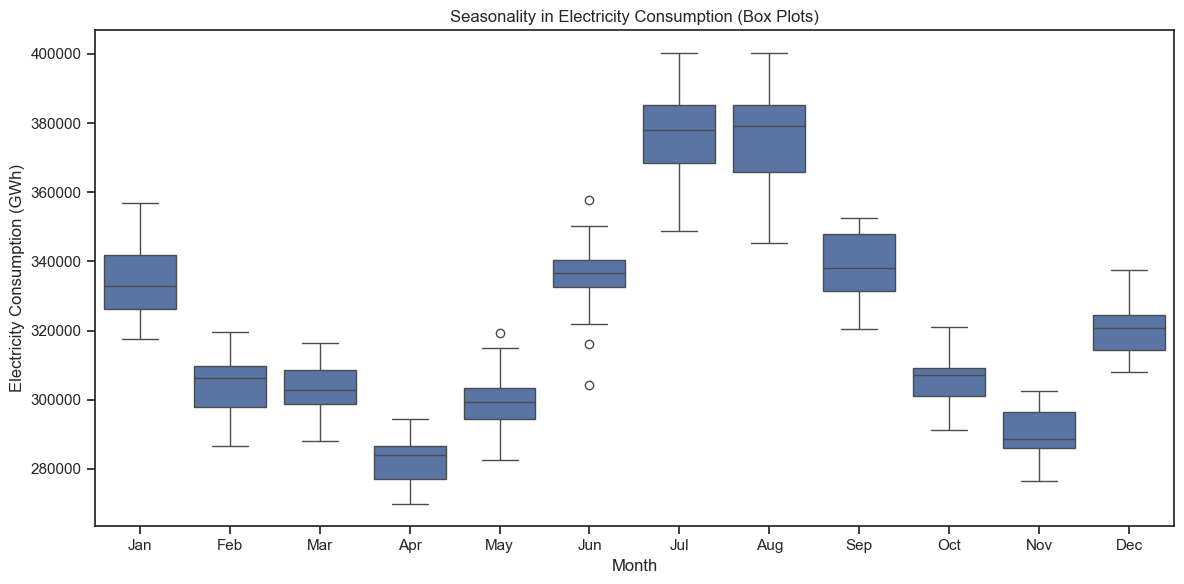

In [26]:
# Task 9: Exploring Seasonality with Box Plots
energy_analysis.task_9()

4_9_Insights:


1.Identifying Unusual Peaks: July and August stand out with notably higher electricity usage, surpassing median consumption in other months. Investigating the reasons behind these peaks, such as heatwaves or industrial activities, is crucial for utilities to manage sudden surges effectively.

2.Consistent Seasonal Variations: Presence of outliers in specific months indicates recurring consumption patterns linked to seasons. Recognizing these patterns helps utilities anticipate fluctuations and prepare the grid accordingly, like higher demand for heating in winter or cooling systems in summer.

3.Societal Factors and Consumer Behavior: Unusual outliers might align with societal events, influencing consumer behavior. Understanding these factors aids utilities in adjusting energy strategies and promoting energy-efficient practices during these periods.

4.Challenges in Renewable Integration: Discrepancies between renewable supply and demand peaks pose integration challenges. Balancing these inconsistencies through storage solutions or demand-side management is essential for stable and sustainable energy supply.

5.Policy Implications: Anomalies in consumption might reflect responses to energy policies or incentives. Clear communication ensures consumers understand changes and adapt their usage accordingly.

6.Infrastructure Planning: Consistently high outliers might necessitate infrastructure upgrades. Proper planning ensures a reliable supply, even during unexpected consumption peaks.

### V. Conclusion

The comprehensive analysis of U.S. electricity consumption and generation patterns from 2003 to 2023 provides valuable insights into the nation's energy landscape. Through meticulous examination, several key observations and implications emerge, shedding light on the ongoing sustainable energy transition:

1.Evolution of Overall Electricity Consumption Trends:

The overall electricity consumption in the United States has exhibited a general upward trend from 2003 to 2023, with occasional fluctuations and periods of growth, stability, or decline. Identifiable peaks or declines were observed during economic recessions, periods of industrial restructuring, or shifts in energy policies. Factors contributing to these shifts include economic growth or downturns, changes in industrial activities, technological advancements influencing energy efficiency, and policy alterations impacting energy usage patterns.

2.Key Factors Impacting Electricity Consumption Patterns:

Several factors contribute to significant shifts in electricity consumption patterns over different years. Economic conditions, technological advancements influencing energy efficiency, population growth, changes in consumer behaviors, policy interventions promoting energy conservation, and shifts in industrial and commercial activities significantly impact electricity consumption dynamics. Additionally, climate variations affecting heating or cooling demands also influence seasonal consumption patterns.

3.Seasonal Patterns and Influential Factors in Electricity Consumption:

Distinct seasonal patterns are evident in U.S. electricity consumption across different months and seasons. Higher consumption occurs during summer and winter months due to increased demand for cooling and heating, respectively. Environmental factors like temperature variations, daylight hours, economic activities, cultural practices, and holiday seasons play pivotal roles in influencing these variations. Anomalies or recurrent trends in consumption during specific seasons often align with climatic variations, economic factors, or societal practices.

4.Changes in Electricity Generation Sources and Dominance:

The contribution of solar, wind, coal, petroleum, and natural gas to the overall electricity generation mix has shown notable changes from 2003 to 2023. Traditional sources like coal and natural gas have historically dominated electricity generation, but there has been a gradual increase in the contribution of renewable sources, especially solar and wind. Shifts in energy policies, advancements in renewable technologies, and environmental concerns have driven the diversification of the energy mix, leading to fluctuations in the dominance of different sources during certain periods.

5.Proportion of Renewable Energy and Impact on Fossil Fuel Dependency:

The proportion of electricity generated from renewable sources, namely solar and wind, has seen a consistent increase but remains relatively smaller compared to traditional sources like coal, petroleum, and natural gas. This upward trajectory in renewables' contribution is attributed to supportive government policies, declining costs of renewable technologies, increased public awareness of environmental concerns, and a focus on reducing reliance on fossil fuels. While renewables' growth is promising, it will take sustained efforts to substantially reduce dependence on fossil fuels.

6.Correlations and Causative Relationships Between Energy Factors:

Correlations exist between electricity consumption, adoption of renewable energy, and usage of traditional energy sources. Causative relationships reveal that policy interventions, technological advancements, economic fluctuations, and consumer behaviors influence energy consumption and the adoption of renewable energy sources. Changes in policies, such as renewable energy mandates or carbon pricing, have notably influenced these correlations, suggesting a direct relationship between policy changes and shifts in energy consumption patterns.

7.Consumer Behavior in Seasonal Electricity Usage and its Alignment with Energy Generation Patterns:

Consumer behavior regarding electricity usage demonstrates distinct patterns during different seasons. Societal practices, economic factors, and climatic variations significantly influence these patterns. Higher electricity usage during summer for air conditioning and during winter for heating aligns with energy generation patterns from renewable and traditional sources. Understanding these behaviors is crucial for utilities to anticipate and manage energy demand effectively, particularly during peak seasons or weather extremes.


### VI. References

1.Electricity Monthly Update

https://www.eia.gov/electricity/monthly/update/archive/october2023/

2.Wholesale Electricity and Natural Gas Market Data

https://www.eia.gov/electricity/wholesale/

3.U.S. construction costs dropped for solar, wind, and natural gas-fired generators in 2021

https://www.eia.gov/todayinenergy/detail.php?id=60562

4.Hands-On-Data-Analysis-with-Pandas-2nd-edition_(Author: Stefanie Molin)

https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/tree/master/ch_07/data
